<a href="https://colab.research.google.com/github/JuneWayne/DS3021-Wrangling/blob/main/lab/Ethan_Cao_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pick something else on Craigslist besides used cars: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of basic EDA you'd do with it.
### Get your search results of interest using requests and extract data from them using beautifulSoup, using code similar to what's above.
### Wrangle your data into a dataframe and do some basic descriptions and plots. Try to find some interesting relationships or stories to tell about your data.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup as soup
import requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
# Charlottesville Area's Bike pricing scraping
url = 'https://charlottesville.craigslist.org/search/sss?query=bicycle#search=1~gallery~0~0'
raw = requests.get(url,headers=header)
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all('li', class_="cl-static-search-result")

In [42]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
def parse_bike_listings(url):
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
  response = requests.get(url,headers=headers)
  if response.status_code == 200:
    # scrape all the available features of bicycles on craigslist by clicking into each individual bicycle pages
    soup = BeautifulSoup(response.content,'html.parser')
    bike_type = soup.find("div", class_="attr bicycle_type").find("a").get_text(strip=True) if soup.find("div", class_="attr bicycle_type") else None
    bike_size = soup.find("div", class_="attr bicycle_frame_size_freeform").find("span", class_="valu").get_text(strip=True) if soup.find("div", class_="attr bicycle_frame_size_freeform") else None
    bike_wheel_size = soup.find("div", class_="attr bicycle_wheel_size").find("a").get_text(strip=True) if soup.find("div", class_="attr bicycle_wheel_size") else None
    bike_frame_material = soup.find("div", class_="attr bicycle_frame_material").find("a").get_text(strip=True) if soup.find("div", class_="attr bicycle_frame_material") else None
    bike_condition = soup.find("div", class_="attr condition").find("a").get_text(strip=True) if soup.find("div", class_="attr condition") else None
    bike_suspension = soup.find("div", class_="attr bicycle_suspension").find("a").get_text(strip=True) if soup.find("div", class_="attr bicycle_suspension") else None
    bike_brake = soup.find("div", class_="attr bicycle_brake_type").find("a").get_text(strip=True) if soup.find("div", class_="attr bicycle_brake_type") else None
    bike_handlebar = soup.find("div", class_="attr bicycle_handlebar_type").find("a").get_text(strip=True) if soup.find("div", class_="attr bicycle_handlebar_type") else None
    bike_assist = soup.find("div", class_="attr bicycle_electric_assist").find("a").get_text(strip=True) if soup.find("div", class_="attr bicycle_electric_assist") else None
    bike_model = soup.find("div", class_="attr sale_model").find("span", class_="valu").get_text(strip=True) if soup.find("div", class_="attr sale_model") else None
    bike_sale_manufacturer = soup.find("div", class_="attr sale_manufacturer").find("span", class_="valu").get_text(strip=True) if soup.find("div", class_="attr sale_manufacturer") else None
    return bike_type, bike_size, bike_wheel_size, bike_frame_material, bike_condition, bike_suspension, bike_brake, bike_handlebar, bike_assist, bike_model, bike_sale_manufacturer
  else:
    return None, None, None, None, None, None, None, None, None, None, None
# scrape the listings as well as the features, and finally appending everything into a data frame
data = []
for k in range(len(listings)):
    description = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text(strip=True) if listings[k].find('div',class_='price') else None
    location = listings[k].find('div',class_='location').get_text(strip=True).lower() if listings[k].find('div',class_='location') else None
    url = listings[k].find(href=True)['href']
    bike_type, bike_size, bike_wheel_size, bike_frame_material, bike_condition, bike_suspension, bike_brake, bike_handlebar, bike_assist, bike_model, bike_sale_manufacturer = parse_bike_listings(url)
    data.append({'description':description,
                 'price':price,
                 'location':location,
                 'link':url,
                 'bike type':bike_type,
                 'bike wheel size':bike_wheel_size,
                 'bike frame material':bike_frame_material,
                 'bike condition':bike_condition,
                 'bike suspension':bike_suspension,
                 'bike brake':bike_brake,
                 'bike handlebar':bike_handlebar,
                 'bike assist':bike_assist,
                 'bike model':bike_model,
                 'bike manufacturer':bike_sale_manufacturer
                 })
df = pd.DataFrame(data)
df.head()

,description,price,location,link,bike type,bike wheel size,bike frame material,bike condition,bike suspension,bike brake,bike handlebar,bike assist,bike model,bike manufacturer
0,2 trek navigator 200 mountain bikes,$250,goochland county va.,https://charlottesville.craigslist.org/bik/d/m...,mountain,26 in,steel,None,None,None,None,None,None,None
1,gotrax tundra fat tire ebike brand new,$750,charlottesville,https://charlottesville.craigslist.org/bik/d/c...,None,None,None,None,None,None,None,None,None,None
2,2022 turbo creo sl comp carbon evo,"$4,200",charlottesville,https://charlottesville.craigslist.org/bik/d/c...,gravel,700C,carbon fiber,excellent,none (rigid),disc (hydraulic),drop,pedal assist,Creo,Specialized
3,bike bunk hitch for rv/trailer,$45,fluvanna,https://charlottesville.craigslist.org/bop/d/k...,None,None,None,None,None,None,None,None,None,None
4,specialized mtb (l),$75,charlottesville,https://charlottesville.craigslist.org/bik/d/c...,None,None,None,None,None,None,None,None,None,None


In [43]:
# replacing different entries of location with their actual location
location_replacement = {
    'albemarle/charlottesville': 'charlottesville',
    'charlottesville avon extended': 'charlottesville',
    'charlottesville ivy': 'charlottesville',
    'charlottesville - ivy': 'charlottesville',
    'chaflottesville': 'charlottesville',
    'downtown': 'charlottesville',
    '📞call☎️(800)220-9683 🏍🏍🏍website www.wantedoldmotorcycles.com': 'charlottesville',
    'dyke': 'charlottesville',
    np.nan: 'charlottesville',
    'venable':'charlottesville'
}
df['location'] = df['location'].replace(location_replacement)
df['location'].value_counts()

,count
location,
charlottesville,35
palmyra,4
ruckersville,3
"crozet, va",2
nellysford,2
earlysville,2
goochland county va.,1
fluvanna,1
lake monticello,1


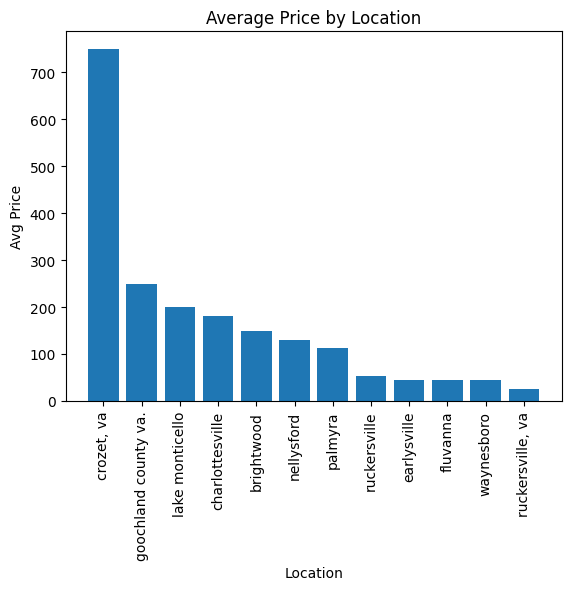

In [44]:
# Exploring Average Price by Location
df['price'] = pd.to_numeric(df['price'].astype(str).str.replace('$', '', regex=False), errors='coerce')
avg_price_by_location = df.groupby('location')['price'].mean().sort_values(ascending=False)
plt.bar( avg_price_by_location.index, avg_price_by_location.values)
plt.xticks(rotation=90)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Avg Price')
plt.show()

In [45]:
# Observing the unique values and null values of each bike features
print(df['bike type'].value_counts())
print(df['bike type'].isnull().sum())
print(df['bike condition'].value_counts())

bike type
mountain          8
road              7
other             2
cruiser           2
gravel            1
hybrid/comfort    1
kids              1
Name: count, dtype: int64
32
bike condition
good         13
like new      7
excellent     4
fair          3
new           2
Name: count, dtype: int64


bike condition
good         13
like new      7
excellent     4
fair          3
new           2
Name: count, dtype: int64


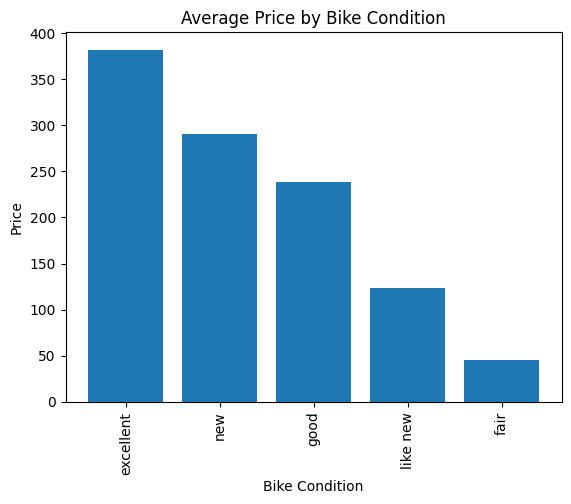

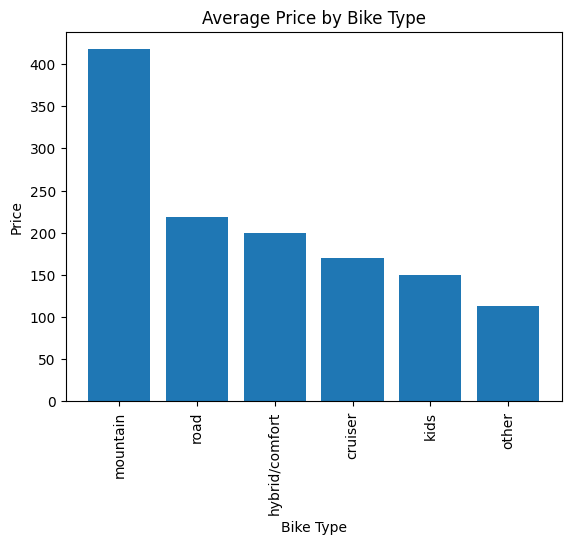

In [46]:
# exploring how average price varies by bike condition
print(df['bike condition'].value_counts())
avg_price_by_condition = df.groupby('bike condition')['price'].mean().sort_values(ascending=False)
plt.bar(avg_price_by_condition.index, avg_price_by_condition.values)
plt.title('Average Price by Bike Condition')
plt.xticks(rotation=90)
plt.xlabel('Bike Condition')
plt.ylabel('Price')
plt.show()

# exploring how average price varies by bike type
avg_price_by_type = df.groupby('bike type')['price'].mean().sort_values(ascending=False)
plt.bar(avg_price_by_type.index, avg_price_by_type.values)
plt.title('Average Price by Bike Type')
plt.xticks(rotation=90)
plt.xlabel('Bike Type')
plt.ylabel('Price')
plt.show()

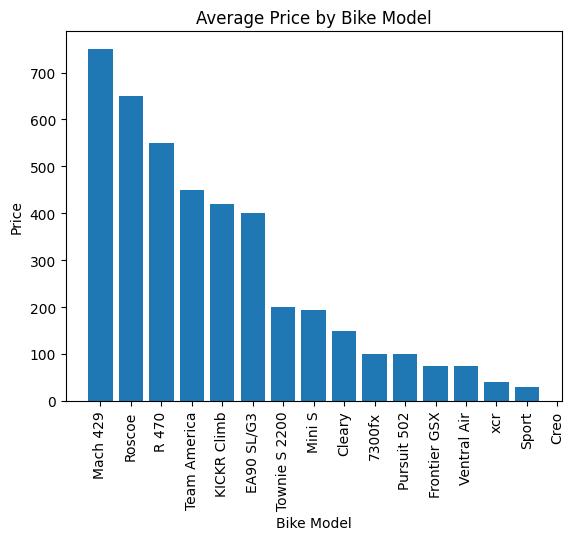

In [55]:
# Exploring the Average price by bike model
df['bike model'].value_counts()
avg_price_by_model = df.groupby('bike model')['price'].mean().sort_values(ascending=False)
plt.bar(avg_price_by_model.index, avg_price_by_model.values)
plt.title('Average Price by Bike Model')
plt.xticks(rotation=90)
plt.xlabel('Bike Model')
plt.ylabel('Price')
plt.show()